In [1]:
import math

import numpy as np
import scipy.stats as st
import torch
from torch import optim
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.nn.functional import normalize
from torch.optim.lr_scheduler import CosineAnnealingLR
import awkward as ak


import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib as mpl
from matplotlib import cm

from memflow.read_data.dataset_all import DatasetCombined

In [2]:
x = torch.Tensor([[[1, 1], [2, 2]], [[3,3], [4,4]], [[5,5], [6,7]]])
print(x.shape)
print(x[0])

x = x.transpose(0,1)
x = torch.flatten(x, start_dim=0, end_dim=1)
print(x.shape)
for i in range(6):
    print(x[i])


torch.Size([3, 2, 2])
tensor([[1., 1.],
        [2., 2.]])
torch.Size([6, 2])
tensor([1., 1.])
tensor([3., 3.])
tensor([5., 5.])
tensor([2., 2.])
tensor([4., 4.])
tensor([6., 7.])


In [3]:
x = torch.Tensor([False, False, True, False, True, False, False, True, True, False])
indices_true = torch.where(x)[0]

if len(indices_true) > 2:
    x[indices_true[2:]] = False

print(x)

tensor([0., 0., 1., 0., 1., 0., 0., 0., 0., 0.])


In [4]:
path = '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_full.pt'
x = torch.load(path, map_location=torch.device('cpu'))
print(x[0].shape)
print(x[1].shape)

# 1612912 - 1611776

/tmp/adpetre/ipykernel_3721326/3589071429.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load(path, map_location=torch.device('cpu'))


torch.Size([1611776, 31, 9, 4])
torch.Size([1611776, 30, 9, 1])


In [6]:
recoObjs = x[0]
print(recoObjs[0,0,:,1])
print(recoObjs[0,1,:,1])
print(recoObjs[1,0,:,1])
print(recoObjs[1,1,:,1])

print(torch.count_nonzero( recoObjs[:,0,...] == -100.0 ))
print(torch.count_nonzero( recoObjs[:,1:,...] == -100.0  ))

recoObjs_series = recoObjs.transpose(0,1)
recoObjs_series = torch.flatten(recoObjs_series, start_dim=0, end_dim=1)
print(torch.all(recoObjs_series[0,:,1] == recoObjs[0,0,:,1]))
print(torch.all(recoObjs_series[1611776,:,1] == recoObjs[0,1,:,1]))
print(torch.all(recoObjs_series[1,:,1] == recoObjs[1,0,:,1]))
print(torch.all(recoObjs_series[1+1611776,:,1] == recoObjs[1,1,:,1]))


maskRecoObjs = recoObjs_series[:,:,0] == 1
maskRecoObjs[:,:8] = 1
print(recoObjs_series.shape)
print(maskRecoObjs.shape)
print()

for i in range(3):
    print(recoObjs_series[i,:,0])
    print(recoObjs_series[i,:,1])
    print(maskRecoObjs[i])
    print()
#torch.save(recoObjs_series, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_onlyReco.pt')
#torch.save(maskRecoObjs, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_MaskOnlyReco.pt')


tensor([-0.8886,  0.3727,  0.2977,  0.2543, -0.5110, -1.3751, -1.0000,  0.9433,
         2.0397])
tensor([-0.5568,  1.5787,  1.1946, -1.0736,  1.5646,  0.2095, -0.1047, -1.0000,
         0.3393])
tensor([  -0.4171,    0.6352,    0.6468,   -0.2164,    0.8800,   -1.2770,
          -1.0000,   -1.0000, -100.0000])
tensor([-0.2539, -0.1426,  0.4534,  0.2115, -1.1935, -1.0000, -1.0000, -0.7174,
        -1.0000])
tensor(1794240)
tensor(0)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
torch.Size([49965056, 9, 4])
torch.Size([49965056, 9])

tensor([1., 1., 1., 1., 1., 1., 0., 1., 1.])
tensor([-0.8886,  0.3727,  0.2977,  0.2543, -0.5110, -1.3751, -1.0000,  0.9433,
         2.0397])
tensor([True, True, True, True, True, True, True, True, True])

tensor([1., 1., 1., 1., 1., 1., 0., 0., 0.])
tensor([  -0.4171,    0.6352,    0.6468,   -0.2164,    0.8800,   -1.2770,
          -1.0000,   -1.0000, -100.0000])
tensor([ True,  True,  True,  True,  True,  True,  True,  True, False])

tensor([1., 1.,

In [57]:
# build boost of reco objs

print(recoObjs_series.shape)
print(recoObjs_series[0]) # objects are unscaled

recoObjs_series_unscaled = recoObjs_series[...,1:].clone()
recoObjs_series_unscaled[...,:2] = recoObjs_series_unscaled[...,:2]*train_dataset.reco_lab.stdRecoParticles[:2] + train_dataset.reco_lab.meanRecoParticles[:2] # unscale pt and eta
recoObjs_series_unscaled[...,0] = torch.exp(recoObjs_series_unscaled[...,0]) - 1 # unscale pt
recoObjs_series_unscaled = torch.where(recoObjs_series[...,0,None].bool(), recoObjs_series_unscaled, 0) # mask jets which don't exist
print(recoObjs_series_unscaled.shape)

# now switch to px py pz
print(recoObjs_series_unscaled[0])

px_jets = recoObjs_series_unscaled[...,0] * torch.cos(recoObjs_series_unscaled[...,2])
py_jets = recoObjs_series_unscaled[...,0] * torch.sin(recoObjs_series_unscaled[...,2])
pz_jets = recoObjs_series_unscaled[...,0] * torch.sinh(recoObjs_series_unscaled[...,1])

print(torch.count_nonzero(torch.isinf(px_jets)))
print(torch.count_nonzero(torch.isinf(py_jets)))
print(torch.count_nonzero(torch.isinf(pz_jets)))

print()

px_boost = torch.sum(px_jets, dim=1)
py_boost = torch.sum(py_jets, dim=1)
pz_boost = torch.sum(pz_jets, dim=1)

boost_pxpypz = torch.stack((px_boost, py_boost, pz_boost), dim=1)
print(boost_pxpypz.shape)

print(torch.count_nonzero(torch.isnan(boost_pxpypz)))
print(torch.count_nonzero(torch.isinf(boost_pxpypz)))


print(boost_pxpypz[:3])

log_boost_pxpypz = torch.sign(boost_pxpypz)*torch.log(1+torch.abs(boost_pxpypz))
print(log_boost_pxpypz.shape)

meanBoost = torch.mean(log_boost_pxpypz, dim=0)
stdBoost = torch.std(log_boost_pxpypz, dim=0)

print(meanBoost.shape)

scaledLogBoost = (log_boost_pxpypz - meanBoost)/stdBoost
print(scaledLogBoost.shape)

#torch.save(scaledLogBoost, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_BoostReco.pt')
#torch.save(meanBoost, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_BoostRecoMean.pt')
#torch.save(stdBoost, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_BoostRecoStd.pt')



torch.Size([49965056, 9, 4])
tensor([[ 1.0000, -0.8886, -0.4707,  0.1164],
        [ 1.0000,  0.3727,  0.0044, -0.8065],
        [ 1.0000,  0.2977, -1.2069, -1.3054],
        [ 1.0000,  0.2543, -0.8592, -2.7388],
        [ 1.0000, -0.5110, -0.5626, -2.3779],
        [ 1.0000, -1.3751, -0.4023,  1.6636],
        [ 0.0000, -1.0000, -1.0000, -1.0000],
        [ 1.0000,  0.9433, -0.7835, -0.4874],
        [ 1.0000,  2.0397,  1.2157,  1.8940]])
torch.Size([49965056, 9, 3])
tensor([[ 4.4174e+01, -4.6539e-01,  1.1644e-01],
        [ 9.3148e+01,  0.0000e+00, -8.0652e-01],
        [ 8.9125e+01, -1.1865e+00, -1.3054e+00],
        [ 8.6875e+01, -8.4595e-01, -2.7388e+00],
        [ 5.5281e+01, -5.5542e-01, -2.3779e+00],
        [ 3.3031e+01, -3.9838e-01,  1.6636e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.3025e+02, -7.7173e-01, -4.8737e-01],
        [ 2.4750e+02,  1.1865e+00,  1.8940e+00]])
tensor(0)
tensor(0)
tensor(0)

torch.Size([49965056, 3])
tensor(0)
tensor(0)
tensor([

In [41]:
print(train_dataset.reco_lab.meanRecoParticles)
print(train_dataset.reco_lab.stdRecoParticles)

log_std_reco = train_dataset.reco_lab.stdRecoParticles
log_mean_reco = train_dataset.reco_lab.meanRecoParticles

# compute reco boost
maskExist_Nonreco = recoObjs_series[:,:,0] == 0
unscaledReco = recoObjs_series.clone()
unscaledReco[...,[1,2]] = (unscaledReco[...,[1,2]]*log_std_reco[:2] + log_mean_reco[:2])
unscaledReco[...,1] = (torch.exp(unscaledReco[...,1]) - 1) # unscale pt
print(unscaledReco.shape)
print(maskExist_Nonreco.shape)
unscaledReco = torch.where(maskExist_Nonreco[...,None], 0, unscaledReco)
print(unscaledReco.shape)

for i in range(3):
    print(maskExist_Nonreco[i])
    print(unscaledReco[i,:,1])

tensor([ 4.3279e+00, -4.3053e-03,  1.0902e-02])
tensor([0.5822, 0.9795, 1.8154])
torch.Size([49965056, 9, 4])
torch.Size([49965056, 9])
torch.Size([49965056, 9, 4])
tensor([False, False, False, False, False, False,  True, False, False])
tensor([ 44.1741,  93.1483,  89.1250,  86.8750,  55.2813,  33.0312,   0.0000,
        130.2500, 247.5000])
tensor([False, False, False, False, False, False,  True,  True,  True])
tensor([ 58.4449, 108.6930, 109.4375,  65.8125, 125.5000,  35.0312,   0.0000,
          0.0000,   0.0000])
tensor([False, False, False, False, False,  True,  True, False, False])
tensor([ 35.7889,  76.4858,  91.6250,  44.4687,  51.0000,   0.0000,   0.0000,
         82.6250, 201.5000])


In [9]:

# pt eta phi on 1/2/3 position
def get_cartesian_comp_noEnergy(particle):
        # px
        Px = particle[...,1]*torch.cos(particle[...,3])
        # py
        Py = particle[...,1]*torch.sin(particle[...,3])
        # pz
        Pz = particle[...,1]*torch.sinh(particle[...,2])
         # E
        return torch.stack((Px, Py, Pz), dim=2)

print(unscaledReco.shape)

unscaledReco_pxpypz = get_cartesian_comp_noEnergy(unscaledReco)
print(unscaledReco_pxpypz.shape)
boost_pxpypz = torch.sum(unscaledReco_pxpypz, dim=1)
print(boost_pxpypz.shape)
print(boost_pxpypz[:3])

torch.Size([49965056, 9, 4])
torch.Size([49965056, 9, 3])
torch.Size([49965056, 3])
tensor([[  45.2659,  -13.8277,  -25.2804],
        [ -41.3549,   82.8204,  371.0551],
        [  97.3789,   78.6112, -902.3790]])


In [8]:
train_dataset = DatasetCombined('/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/all_jets_fullRun2_ttHbb_forTraining_allyears_spanetprov_part1_train.parquet',
                                dev=torch.device('cpu'), new_higgs=True,
                                dtype=torch.float64, datasets=['partons_lab', 'reco_lab', 'partons_CM'],
                           reco_list_lab=['scaledLogReco_sortedBySpanet',
                                          'mask_scaledLogReco_sortedBySpanet',
                                          'mask_boost', 'scaledLogBoost',
                                          'scaledLogRecoParticles_phiUnscaled',
                                          'scaledLogRecoParticles_phiScaled'],
                           parton_list_cm=['phasespace_intermediateParticles_onShell_logit_scaled',
                                          'scaledLogBoost',
                                          'phasespace_intermediateParticles_onShell'],
                           parton_list_lab=['logScaled_data_higgs_t_tbar_ISR',
                                           'logScaled_data_boost'])

recoTarget = train_dataset.reco_lab.scaledLogReco_sortedBySpanet
mask_recoTarget = train_dataset.reco_lab.mask_scaledLogReco_sortedBySpanet
boost_target = train_dataset.reco_lab.scaledLogBoost
mask_boost_target = train_dataset.reco_lab.mask_boost
boost_target = train_dataset.reco_lab.data_boost

logScaled_partons = train_dataset.partons_lab.logScaled_data_higgs_t_tbar_ISR
boost_partons = train_dataset.partons_lab.logScaled_data_boost
PS_rambo = train_dataset.partons_CM.phasespace_intermediateParticles_onShell_logit_scaled

>>Loading datasets
Loading partons in LAB
PartonLevel LAB
/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/all_jets_fullRun2_ttHbb_forTraining_allyears_spanetprov_part1_train/processed_partonsNoBoost_newHiggs/
Reading parton_level Files
Load logScaled_data_higgs_t_tbar_ISR
Load logScaled_data_boost
Parton: Move tensors to device (cpu) memory
Loading reco in LAB
RecoLevel LAB
Reading reco_level Files
Load scaledLogBoost
Load scaledLogRecoParticles_phiScaled
Load scaledLogRecoParticles_phiUnscaled
Load scaledLogReco_sortedBySpanet
Reco: Move tensors to device (cpu) memory
Loading partons in CM
PartonLevel CM
Reading parton_level Files
Load scaledLogBoost
Load phasespace_intermediateParticles_onShell
Load phasespace_intermediateParticles_onShell_logit
Parton: Move tensors to device (cpu) memory
Loaded datasets:  ['partons_lab', 'reco_lab', 'partons_CM']


In [9]:
ev = 0

print( recoTarget[ev,:,1] )
print( mask_recoTarget[ev,:] )

tensor([   0.2977,    0.2543,   -0.5110,   -1.3751,   -1.0000,    0.9433,
          -0.8886,    0.3727,    2.0397,   -1.3766, -100.0000, -100.0000,
        -100.0000, -100.0000, -100.0000, -100.0000, -100.0000, -100.0000,
        -100.0000, -100.0000, -100.0000], dtype=torch.float64)
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.], dtype=torch.float64)


In [54]:
# NOT INTERESTING ANYMORE: I DONT NEED ANY SORT BY I CAN LOAD BOTH TENSORS IN THE DATASET SINCE THEY ARE THE SAME
# IT WAS NOT WORKING ANYWAY

x = train_dataset.reco_lab.scaledLogRecoParticles_phiUnscaled

recoTarget_ptetaphi = recoTarget[...,1:4]
mask_jetsSPANET = torch.logical_and(recoTarget_ptetaphi[...,0] == 0.0, recoTarget_ptetaphi[...,1] == 0.0)
recoTarget_ptetaphi[mask_jetsSPANET] = -100.0



sorted, indices = torch.sort(recoTarget_ptetaphi[:,[0,1,2,3,4,5,8,9,10,11,12,13,14,15],0], dim=1, descending=True, stable=True)


# Sort along the second dimension (dim=1) based on the first element of the last dimension
# then i need to order by eta (still decreasing)
jets_sortedByPt = torch.gather(recoTarget_ptetaphi[:,[0,1,2,3,4,5,8,9,10,11,12,13,14,15]], 1, indices[...,None].expand(-1, -1, 3))
mask_jetsSPANET_ordered = torch.gather(mask_jetsSPANET[:,[0,1,2,3,4,5,8,9,10,11,12,13,14,15]], 1, indices)

mask_eta = jets_sortedByPt[:,:-1,0] == jets_sortedByPt[:,1:,0]
mask_eta = torch.logical_and(mask_eta, ~mask_jetsSPANET_ordered[:,1:14])


jets_sortedByPt_andLeptonMET = torch.cat((recoTarget_ptetaphi[:,[6,7],:], jets_sortedByPt), dim=1)

mask_jets_sortedByPt_andLeptonMET = jets_sortedByPt_andLeptonMET == -100.0
jets_sortedByPt_andLeptonMET[mask_jets_sortedByPt_andLeptonMET] = 0.0


mask_jet = jets_sortedByPt_andLeptonMET[:1000] != x[:1000,[-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13],:3]



In [58]:
print(PS_rambo.shape)
print(5* torch.std(train_dataset.partons_CM.phasespace_intermediateParticles_onShell_logit, dim=1))
print(torch.mean(train_dataset.partons_CM.phasespace_intermediateParticles_onShell_logit, dim=1))

torch.Size([1612912, 10])
tensor([10.2528, 14.2562, 11.6059,  ...,  9.5502,  7.7008,  9.3997],
       dtype=torch.float64)
tensor([ 0.4645, -0.6419,  1.3965,  ...,  0.7536,  0.3169,  1.7145],
       dtype=torch.float64)


In [6]:
print(train_dataset.reco_lab.meanRecoParticles)
print(train_dataset.reco_lab.stdRecoParticles)

print(train_dataset.partons_CM.mean_phasespace_intermediateParticles_onShell_logit)
print(train_dataset.partons_CM.std_phasespace_intermediateParticles_onShell_logit)

tensor([ 4.3279e+00, -4.3053e-03,  1.0902e-02])
tensor([0.5822, 0.9795, 1.8154])
tensor([ 2.4564e+00,  1.3425e+00, -4.6606e-03,  7.8860e-04, -2.1456e-03,
         2.7660e-04, -6.6241e-03,  5.0267e-03,  4.5121e-01,  5.0199e-01],
       dtype=torch.float64)
tensor([ 9.8929, 10.0761, 10.1887,  9.0733, 10.9712,  9.0767, 13.9509,  9.0681,
         3.5302,  3.6533], dtype=torch.float64)


In [29]:
logit_ps = torch.logit(train_dataset.partons_CM.phasespace_intermediateParticles_onShell, eps=5e-5)
ps_mean = logit_ps.nanmean(0)
ps_scale = torch.sqrt(torch.nanmean(torch.pow(logit_ps, 2), 0) - torch.pow(ps_mean,2))

print(5*ps_scale)
print(train_dataset.partons_CM.std_phasespace_intermediateParticles_onShell_logit)
print(5 * torch.std(train_dataset.partons_CM.phasespace_intermediateParticles_onShell_logit, dim=0))

tensor([ 9.8929, 10.0761, 10.1887,  9.0733, 10.9712,  9.0767, 13.9509,  9.0681,
         3.5302,  3.6533], dtype=torch.float64)
tensor([ 9.8929, 10.0761, 10.1887,  9.0733, 10.9712,  9.0767, 13.9509,  9.0681,
         3.5302,  3.6533], dtype=torch.float64)
tensor([ 9.8929, 10.0761, 10.1887,  9.0733, 10.9713,  9.0768, 13.9509,  9.0681,
         3.5302,  3.6533], dtype=torch.float64)


torch.Size([1612912, 10])


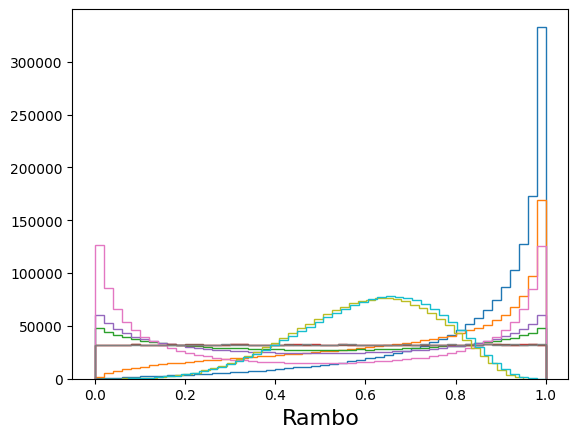

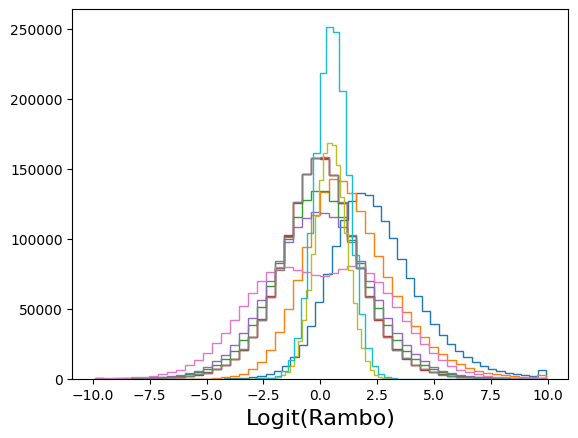

tensor([ 0.4645, -0.6419,  1.3965,  ...,  0.7536,  0.3169,  1.7145],
       dtype=torch.float64)
tensor([2.0506, 2.8512, 2.3212,  ..., 1.9100, 1.5402, 1.8799],
       dtype=torch.float64)


In [6]:
print(train_dataset.partons_CM.phasespace_intermediateParticles_onShell.shape)
for i in range(10):
    plt.hist(train_dataset.partons_CM.phasespace_intermediateParticles_onShell[...,i].numpy(), bins=50, histtype='step');

plt.xlabel('Rambo', fontsize=16)

plt.show()

for i in range(10):
    plt.hist(torch.logit(train_dataset.partons_CM.phasespace_intermediateParticles_onShell[...,i], eps=5e-5).numpy(), bins=50, histtype='step');

plt.xlabel('Logit(Rambo)', fontsize=16)
plt.show()

print(torch.mean(torch.logit(train_dataset.partons_CM.phasespace_intermediateParticles_onShell, eps=5e-5), dim=1))
print(torch.std(torch.logit(train_dataset.partons_CM.phasespace_intermediateParticles_onShell, eps=5e-5), dim=1))

In [14]:
recoObjects = train_dataset.reco_lab.scaledLogRecoParticles

print(recoObjects.shape)

for i in range(1):
    print(recoObjects[i,:,-1])

no_reconstructed_after6thPosition = recoObjects[:,7:-2,-1] > 0 # remove also leptons
print(no_reconstructed_after6thPosition.shape) 
print(no_reconstructed_after6thPosition[0])

checkEvents_reconstructed_after6thPosition = torch.any(no_reconstructed_after6thPosition, dim=1)
print(checkEvents_reconstructed_after6thPosition.shape)

print(torch.count_nonzero(checkEvents_reconstructed_after6thPosition) / len(checkEvents_reconstructed_after6thPosition))
print()

no_reconstructed_after7thPosition = recoObjects[:,8:-2,-1] > 0 # remove also leptons
print(no_reconstructed_after7thPosition.shape) 
print(no_reconstructed_after7thPosition[0])

checkEvents_reconstructed_after7thPosition = torch.any(no_reconstructed_after7thPosition, dim=1)
print(checkEvents_reconstructed_after7thPosition.shape)

print(torch.count_nonzero(checkEvents_reconstructed_after7thPosition) / len(checkEvents_reconstructed_after7thPosition))
print()

no_reconstructed_after8thPosition = recoObjects[:,9:-2,-1] > 0 # remove also leptons
print(no_reconstructed_after8thPosition.shape) 
print(no_reconstructed_after8thPosition[0])

checkEvents_reconstructed_after8thPosition = torch.any(no_reconstructed_after8thPosition, dim=1)
print(checkEvents_reconstructed_after8thPosition.shape)

print(torch.count_nonzero(checkEvents_reconstructed_after8thPosition) / len(checkEvents_reconstructed_after8thPosition))

torch.Size([1612912, 18, 8])
tensor([ 4.,  3.,  2.,  1.,  5.,  5.,  1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1.,  0.,  0.], dtype=torch.float64)
torch.Size([1612912, 9])
tensor([False, False, False, False, False, False, False, False, False])
torch.Size([1612912])
tensor(0.0429)

torch.Size([1612912, 8])
tensor([False, False, False, False, False, False, False, False])
torch.Size([1612912])
tensor(0.0109)

torch.Size([1612912, 7])
tensor([False, False, False, False, False, False, False])
torch.Size([1612912])
tensor(0.0025)


In [14]:
print(PS_rambo.shape)
PS_rambo_repeated = PS_rambo[:1611776].repeat(31, 1)
print(PS_rambo_repeated.shape)
print(torch.all(PS_rambo[0] == PS_rambo_repeated[1]))
print(torch.all(PS_rambo[0] == PS_rambo_repeated[1611776]))

# 49965056

#torch.save(PS_rambo_repeated, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_PSRamboOnShellLogit.pt')



torch.Size([1612912, 10])
torch.Size([49965056, 10])
tensor(False)
tensor(True)


In [9]:
print(train_dataset.reco_lab.meanRecoParticles)
print(train_dataset.reco_lab.stdRecoParticles)

#torch.save(train_dataset.reco_lab.meanRecoParticles, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_meanReco.pt')
#torch.save(train_dataset.reco_lab.stdRecoParticles, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_stdReco.pt')

print(train_dataset.partons_lab.mean_log_data_higgs_t_tbar_ISR)
print(train_dataset.partons_lab.std_log_data_higgs_t_tbar_ISR)

#torch.save(train_dataset.partons_lab.mean_log_data_higgs_t_tbar_ISR, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_meanPartons.pt')
#torch.save(train_dataset.partons_lab.std_log_data_higgs_t_tbar_ISR, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_stdPartons.pt')

print(train_dataset.partons_lab.mean_log_data_boost)
print(train_dataset.partons_lab.std_log_data_boost)

#torch.save(train_dataset.partons_lab.mean_log_data_boost, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_meanPartonsBoost.pt')
#torch.save(train_dataset.partons_lab.std_log_data_boost, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_stdPartonsBoost.pt')

print(train_dataset.partons_CM.mean_phasespace_intermediateParticles_onShell_logit)
print(train_dataset.partons_CM.std_phasespace_intermediateParticles_onShell_logit)

#torch.save(train_dataset.partons_CM.mean_phasespace_intermediateParticles_onShell_logit, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_meanRamboOnShellLogit.pt')
#torch.save(train_dataset.partons_CM.std_phasespace_intermediateParticles_onShell_logit, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_stdRamboOnShellLogit.pt')



tensor([ 4.3279e+00, -4.3053e-03,  1.0902e-02])
tensor([0.5822, 0.9795, 1.8154])
tensor([ 4.6722e+00, -6.6288e-03,  1.3556e-03], dtype=torch.float64)
tensor([0.9196, 1.5784, 1.8139], dtype=torch.float64)
tensor([ 7.1853, -6.9543])
tensor([4.1579e-01, 1.0232e+03])
tensor([ 2.4564e+00,  1.3425e+00, -4.6606e-03,  7.8860e-04, -2.1456e-03,
         2.7660e-04, -6.6241e-03,  5.0267e-03,  4.5121e-01,  5.0199e-01],
       dtype=torch.float64)
tensor([ 9.8929, 10.0761, 10.1887,  9.0733, 10.9712,  9.0767, 13.9509,  9.0681,
         3.5302,  3.6533], dtype=torch.float64)


In [10]:
print(torch.any(recoTarget[:,18,0] == 1))

print(recoTarget.shape)
print(mask_recoTarget.shape)
print(boost_target.shape)
print(mask_boost_target.shape)
print()

print(logScaled_partons.shape)
print(boost_partons.shape)
print(PS_rambo.shape)


log_std_reco = train_dataset.reco_lab.stdRecoParticles
log_mean_reco = train_dataset.reco_lab.meanRecoParticles

# compute reco boost
maskExist_Nonreco = recoTarget[:,:,0] == 0
unscaledReco = recoTarget[...,:4].clone()
unscaledReco[...,[1,2]] = (unscaledReco[...,[1,2]]*log_std_reco[:2] + log_mean_reco[:2])
unscaledReco[...,1] = (torch.exp(unscaledReco[...,1]) - 1) # unscale pt
unscaledReco = torch.where(maskExist_Nonreco[...,None], 0, unscaledReco)

print(unscaledReco[:3])
if False:
    for i in range(3):
        print(maskExist_Nonreco[i])
        print(unscaledReco[i,:,1])

print(unscaledReco.shape)

unscaledReco_pxpypz = get_cartesian_comp_noEnergy(unscaledReco)
print(unscaledReco_pxpypz.shape)
boost_pxpypz = torch.sum(unscaledReco_pxpypz, dim=1)

print(boost_target.shape)
print(boost_pxpypz.shape)
print(boost_pxpypz[:3])
print(boost_target[:3])

tensor(True)
torch.Size([1612912, 21, 14])
torch.Size([1612912, 21])
torch.Size([1612912, 1, 4])
torch.Size([1612912, 1])

torch.Size([1612912, 4, 3])
torch.Size([1612912, 2])
torch.Size([1612912, 10])
tensor([[[ 1.0000e+00,  8.9125e+01, -1.1865e+00, -1.3054e+00],
         [ 1.0000e+00,  8.6875e+01, -8.4595e-01, -2.7388e+00],
         [ 1.0000e+00,  5.5281e+01, -5.5542e-01, -2.3779e+00],
         [ 1.0000e+00,  3.3031e+01, -3.9838e-01,  1.6636e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 1.0000e+00,  1.3025e+02, -7.7173e-01, -4.8737e-01],
         [ 1.0000e+00,  4.4174e+01, -4.6539e-01,  1.1644e-01],
         [ 1.0000e+00,  9.3148e+01, -1.0864e-10, -8.0652e-01],
         [ 1.0000e+00,  2.4750e+02,  1.1865e+00,  1.8940e+00],
         [ 1.0000e+00,  3.3000e+01,  1.1697e+00,  3.0435e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.000

In [11]:
def get_cartesian_comp_noEnergy(particle):
        # px
        Px = particle[...,0]*torch.cos(particle[...,2])
        # py
        Py = particle[...,0]*torch.sin(particle[...,2])
        # pz
        Pz = particle[...,0]*torch.sinh(particle[...,1])
         # E
        return torch.stack((Px, Py, Pz), dim=2)

In [12]:
recoJetsTarget = train_dataset.reco_lab.data_jets
leptonRecoTarget = train_dataset.reco_lab.data_lepton
METTarget = train_dataset.reco_lab.data_met
print(recoJetsTarget[0])
print(leptonRecoTarget[0])
print(METTarget[0])
print()

print(recoJetsTarget.shape)
recoJetsTarget_pxpypz = get_cartesian_comp_noEnergy(recoJetsTarget)
leptonTarget_pxpypz = get_cartesian_comp_noEnergy(leptonRecoTarget)
metTarget_pxpypz = get_cartesian_comp_noEnergy(METTarget)
print(leptonTarget_pxpypz[8])
print(recoJetsTarget_pxpypz.shape)

boost_pxpypz = torch.sum(recoJetsTarget_pxpypz, dim=1)[:,None,:] + leptonTarget_pxpypz + metTarget_pxpypz
print(boost_pxpypz.shape)

print(boost_pxpypz[:3])

tensor([[ 2.4750e+02,  1.1865e+00,  1.8940e+00,  2.7065e-03,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  4.0000e+00],
        [ 1.3025e+02, -7.7173e-01, -4.8737e-01,  9.9902e-01,  0.0000e+00,
          7.0348e-01,  0.0000e+00,  3.0000e+00],
        [ 8.9125e+01, -1.1865e+00, -1.3054e+00,  9.9316e-01,  6.0062e-01,
          0.0000e+00,  5.4192e-01,  2.0000e+00],
        [ 8.6875e+01, -8.4595e-01, -2.7388e+00,  9.9951e-01,  0.0000e+00,
          0.0000e+00,  5.4192e-01,  1.0000e+00],
        [ 5.5281e+01, -5.5542e-01, -2.3779e+00,  9.9640e-03,  6.0062e-01,
          0.0000e+00,  0.0000e+00,  5.0000e+00],
        [ 3.3031e+01, -3.9838e-01,  1.6636e+00,  1.8951e-02,  6.0062e-01,
          0.0000e+00,  0.0000e+00,  5.0000e+00],
        [ 3.3000e+01,  1.1697e+00,  3.0435e+00,  9.9951e-01,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  1.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00, -1.0000e+00],
        [ 0.0000

In [13]:
print(recoTarget.shape)
print(recoObjs.shape)
new_order_list = [6,7,0,1,2,3,4,5,8]
print(torch.all(recoTarget[0, :9, :4][new_order_list] ==  recoObjs[0,0]))
print(torch.all(recoTarget[:1611776, :9, :4][:,new_order_list] ==  recoObjs[:,0]))
#print(recoTarget[0, :9, :4])
#print(recoObjs[0,0])

torch.Size([1612912, 21, 14])
torch.Size([1611776, 31, 9, 4])
tensor(True)
tensor(True)


In [19]:
print(logScaled_partons.shape)
logScaled_partons_repeated = logScaled_partons[:1611776].repeat(31, 1, 1)
print(torch.all(logScaled_partons_repeated[0] == logScaled_partons_repeated[1]))
print(torch.all(logScaled_partons_repeated[0] == logScaled_partons_repeated[1611776]))
print(logScaled_partons_repeated.shape)
# 49965056

#torch.save(logScaled_partons_repeated, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_partons.pt')



torch.Size([1612912, 4, 3])
tensor(False)
tensor(True)
torch.Size([49965056, 4, 3])


In [24]:

print(boost_partons.shape)
boost_partons_repeated = boost_partons[:1611776].repeat(31, 1)
print(torch.all(boost_partons_repeated[0] == boost_partons_repeated[1]))
print(torch.all(boost_partons_repeated[0] == boost_partons_repeated[1611776]))
print(boost_partons_repeated.shape)
# 49965056

# torch.save(boost_partons_repeated, '/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/alignTFwithUnfolding_trainData_BoostPartons.pt')






torch.Size([1612912, 2])
tensor(False)
tensor(True)
torch.Size([49965056, 2])


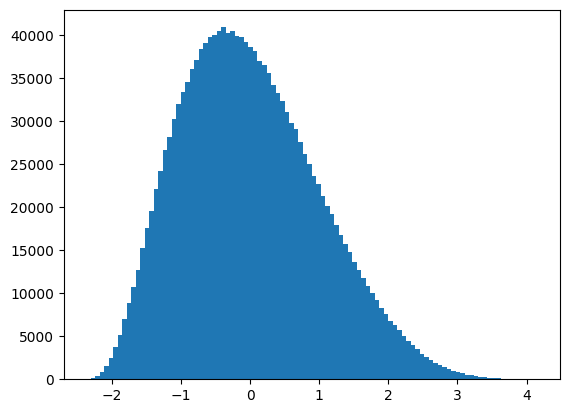

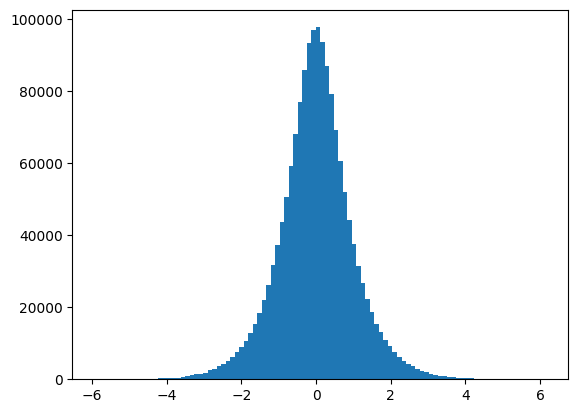

In [16]:
# check boost of partons
for i in range(2):
    plt.hist(boost_partons[...,i].numpy(), bins=100)
    plt.show()

In [37]:
print(train_dataset.reco_lab.scaledLogBoost.shape) # boost reco
print(train_dataset.reco_lab.scaledLogBoost[0])

torch.Size([1612912, 1, 4])
tensor([[ 0.4439,  0.8096, -0.8409,  0.5485]], dtype=torch.float64)


In [6]:
# get good events

print(recoTarget.shape)
print(recoTarget[0,0,:])
print(recoTarget[0,:,-2])

mask_prov = torch.count_nonzero(recoTarget[:,:9,-2] > 0, dim=1) == 7
print(mask_prov[:5])

print(torch.count_nonzero(mask_prov) / mask_prov.shape[0])

mask_prov_2 = torch.count_nonzero(recoTarget[:,:,-2] > 0, dim=1) == 7
print(mask_prov_2[:5])

print(torch.count_nonzero(mask_prov_2) / mask_prov.shape[0])

# how many events have a jetmatched after position 9
matchedJets_after9Pos = torch.count_nonzero(recoTarget[:,9:,-2] > 0, dim=1) > 0
print(matchedJets_after9Pos[:5])

print(torch.count_nonzero(matchedJets_after9Pos) / mask_prov.shape[0])

torch.Size([1612912, 21, 14])
tensor([ 1.0000,  0.2977, -1.2069, -1.3054,  0.5584,  0.8416, -1.1816, -1.2438,
         0.9932,  0.6006,  0.0000,  0.5419,  2.0000,  0.5622],
       dtype=torch.float64)
tensor([   2.,    1.,    5.,    5.,   -1.,    3.,    0.,    0.,    4.,    1.,
        -100., -100., -100., -100., -100., -100., -100., -100., -100., -100.,
        -100.], dtype=torch.float64)
tensor([False, False, False, False, False])
tensor(0.0158)
tensor([ True, False, False, False, False])
tensor(0.0410)
tensor([ True, False,  True, False,  True])
tensor(0.1712)


In [6]:
array = ak.from_parquet('/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/all_jets_fullRun2_ttHbb_forTraining_allyears_spanetprov_part1_train.parquet')
print(array.fields)
jets = ak.with_name(array['jets'], name="Momentum4D")
met = ak.with_name(array['met'], name="Momentum4D")
lepton_reco = ak.with_name(array['lepton_reco'], name="Momentum4D")
lepton_parton = ak.with_name(array['lepton_partons'], name="Momentum4D")
partons = ak.with_name(array['partons'], name="Momentum4D")

print(met[0])

print(jets.px)
px_sum = ak.sum(jets.px, axis=1) + met.px + lepton_reco.px
print(px_sum)

py_sum = ak.sum(jets.py, axis=1) + met.py + lepton_reco.py
print(py_sum)

px_sum = ak.sum(jets.px, axis=1) + met.px + lepton_parton[:,0].px
print(px_sum)


py_sum = ak.sum(jets.py, axis=1) + met.py + lepton_parton[:,0].py
print(py_sum)

['partons_matched', 'partons', 'generator_info', 'lepton_partons', 'lepton_reco', 'met', 'higgs', 'weight', 'prob_ak', 'jets']
{pt: 93.1, eta: 0, phi: -0.807, m: 0}
[[-78.6, 115, 23.4, -79.9, -39.9, -3.06, -32.8], ..., [24, -91.2, ..., -70]]
[[12.4], [-41.4], [-4.25], [58.6], ..., [-16.6], [23.7], [-28.8], [-48.2]]
[[-10.6], [82.8], [36.4], [10.7], ..., [19.5], [-17.4], [-11.9], [29.2]]
[13.3, -40.6, -3.19, 57.2, 22, 0.649, ..., -37.9, 48.1, -17, 25.6, -30.3, -47.5]
[-10.9, 82.5, 37.1, 6.49, -13, -68.4, ..., -78.7, 18.6, -15.5, -10.7, 27.3]


In [10]:
partons_px =  ak.sum(partons.px, axis=1) + ak.sum(lepton_parton.px, axis=1)
partons_py =  ak.sum(partons.py, axis=1) + ak.sum(lepton_parton.py, axis=1)
partons_pz =  ak.sum(partons.pz, axis=1) + ak.sum(lepton_parton.pz, axis=1)

print(partons_px)
print(partons_py)
print(partons_pz)

boost = ak.sum(partons, axis=1) + ak.sum(lepton_parton, axis=1)
print(boost[0])
print(boost[0].pt)
print(boost[0].eta)
print(boost[0].phi)

[-0.707, -1.7, -1.29, 4.25, -75.9, 45.3, ..., 7.54, -2.58, -1.8, -0.343, -0.498]
[1.04, 1.35, 0.0777, 2.97, 25.9, 23.9, ..., -11.4, -3.15, 1.66, -0.594, -0.0686]
[41.4, 3.27e+03, -883, -595, -869, ..., -1.04e+03, 209, 295, -487, 252]
{x: -0.707, y: 1.04, z: 41.4, t: 1.25e+03}
1.2605672373912689
4.18420548484941
2.1666434008363966


In [34]:
class model(nn.Module):
    def __init__(self):

        super(model, self).__init__()
        
        self.linearDNN_reco = nn.Linear(in_features=5, out_features=10)

        classifier_list = []

        for i in range(2):
            layers = [nn.Linear(10, 7), nn.GELU()] # + 1 because we have added the encoded position in the output_decoder
            for i in range(2 - 1):
                layers.extend([nn.Linear(7, 7), nn.GELU(), nn.Dropout(0.5)])

            layers.append(nn.Linear(7, 1))
            layers.append(nn.Sigmoid())

            classifier_list.append(nn.Sequential(*layers))

        self.classifier_list = nn.ModuleList([
            classifier_list[i] for i in range(2)
        ])

    def forward(self, input):
        x = self.linearDNN_reco(input)
        prob_each_jet = torch.empty((input.shape[0], 2))
        #prob_each_jet = self.classifier_list(x)
        for i in range(2):
            #print(self.classifier_list[i](x[:,i]).shape)
            #print(prob_each_jet[:,i].shape)
            prob_each_jet[:,i] = self.classifier_list[i](x[:,i])[:,0]
                                
        return prob_each_jet

In [27]:
input = torch.rand(3,2,5)
model_1 = model()
print(model_1.classifier_list)
out = model_1(input)
print(out.shape)

ModuleList(
  (0-1): 2 x Sequential(
    (0): Linear(in_features=10, out_features=7, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=7, out_features=7, bias=True)
    (3): GELU(approximate='none')
    (4): Dropout(p=0.5, inplace=False)
    (5): Linear(in_features=7, out_features=1, bias=True)
    (6): Sigmoid()
  )
)
torch.Size([3, 2])


In [28]:
model_checkpoint = {
    'model_state_dict': model_1.state_dict()
}

torch.save(model_checkpoint, 'a.pt')

In [32]:
b = torch.load('a.pt')
print(b['model_state_dict'])
model_2 = model()
model_2.load_state_dict(b['model_state_dict'])

OrderedDict([('linearDNN_reco.weight', tensor([[-0.0201,  0.1809, -0.0459,  0.1499, -0.1743],
        [-0.2575,  0.3990, -0.4267, -0.1939,  0.2308],
        [ 0.2129, -0.2348,  0.1858,  0.1075, -0.4379],
        [-0.2710,  0.2968, -0.2154, -0.3832,  0.4420],
        [-0.3477, -0.1587, -0.1859,  0.3032, -0.3747],
        [-0.2564,  0.2500,  0.4434,  0.0722,  0.2097],
        [-0.0046,  0.3799,  0.4177,  0.1023,  0.3495],
        [-0.1861, -0.1313,  0.0203, -0.0835,  0.1582],
        [-0.1857, -0.3351, -0.3821, -0.0103, -0.1048],
        [ 0.3731, -0.1452,  0.2451, -0.2320,  0.3006]])), ('linearDNN_reco.bias', tensor([ 0.4434,  0.4012, -0.2615,  0.0729, -0.0868, -0.2114, -0.3907,  0.0986,
        -0.0403,  0.2931])), ('classifier_list.0.0.weight', tensor([[-0.0388, -0.1186,  0.1442, -0.2439, -0.2768,  0.2667, -0.2932,  0.1972,
          0.3047, -0.0418],
        [-0.2361, -0.2336,  0.2461, -0.2641,  0.2525,  0.0178, -0.1651, -0.3137,
         -0.1595, -0.0113],
        [-0.1585, -0.1602,

<All keys matched successfully>

In [34]:
# Create a dictionary to store the state_dicts of each model
model_dict = {f"model_{i}": model.state_dict() for i, model in enumerate(model_1.classifier_list)}

# Save the dictionary to a file
torch.save(model_dict, "b.pth")

In [37]:
b = torch.load('b.pth')
print(b)
model_1.classifier_list.load_state_dict(b)

{'model_0': OrderedDict([('0.weight', tensor([[-0.2849,  0.0511, -0.0482, -0.3084,  0.2249, -0.1118,  0.0010, -0.2825,
          0.2414, -0.1402],
        [-0.0177,  0.1681,  0.2512, -0.1447,  0.1471,  0.2723,  0.1297, -0.2716,
         -0.0410, -0.1187],
        [-0.1774,  0.2594, -0.1589,  0.0798,  0.0932, -0.0347,  0.0755, -0.3061,
          0.0509, -0.0464],
        [ 0.1074, -0.0724, -0.2297, -0.0278, -0.1183, -0.1680, -0.1037, -0.0976,
          0.2378,  0.2926],
        [ 0.2550,  0.2886, -0.1516,  0.2327, -0.2027,  0.1518,  0.1839, -0.3071,
          0.1124,  0.1196],
        [-0.2672, -0.1721,  0.0339, -0.0476,  0.1881, -0.1499, -0.1101, -0.3129,
          0.0563, -0.0457],
        [ 0.1890, -0.1454,  0.3069, -0.0079, -0.0640,  0.0400,  0.1636,  0.1482,
          0.3101, -0.1262]])), ('0.bias', tensor([-0.0828, -0.2089, -0.2384, -0.1302,  0.0019,  0.0140,  0.1439])), ('2.weight', tensor([[-0.3506, -0.2897, -0.2510,  0.2654,  0.1306, -0.0614,  0.1756],
        [ 0.2690,  0.3456

AttributeError: 'list' object has no attribute 'load_state_dict'

In [38]:
model_list = nn.ModuleList([
    nn.Sequential(nn.Linear(10, 20), nn.ReLU()),
    nn.Sequential(nn.Linear(20, 10), nn.Sigmoid())
])
print(model_list[0])
print(model_list[1])

Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
)
Sequential(
  (0): Linear(in_features=20, out_features=10, bias=True)
  (1): Sigmoid()
)


In [36]:


weights = torch.load('/eos/user/a/adpetre/www/ttHbbAnalysis/MEMFlow/models_archive/transferFlow_paperVersion_Propagators_autoreg_latentSpace_gaussian_v3_v7-3D-autoreg-7-refPaper2_6/dir/model_transfer_flow_2nd_2nd.pt')

print(weights['model_state_dict'].keys())

odict_keys(['flow_kinematics_lepton_pt.transform.transforms.0.hyper.0.weight', 'flow_kinematics_lepton_pt.transform.transforms.0.hyper.0.bias', 'flow_kinematics_lepton_pt.transform.transforms.0.hyper.2.weight', 'flow_kinematics_lepton_pt.transform.transforms.0.hyper.2.bias', 'flow_kinematics_lepton_pt.transform.transforms.0.hyper.4.weight', 'flow_kinematics_lepton_pt.transform.transforms.0.hyper.4.bias', 'flow_kinematics_lepton_pt.base._0', 'flow_kinematics_lepton_pt.base._1', 'flow_kinematics_lepton_eta.transform.transforms.0.hyper.0.weight', 'flow_kinematics_lepton_eta.transform.transforms.0.hyper.0.bias', 'flow_kinematics_lepton_eta.transform.transforms.0.hyper.2.weight', 'flow_kinematics_lepton_eta.transform.transforms.0.hyper.2.bias', 'flow_kinematics_lepton_eta.transform.transforms.0.hyper.4.weight', 'flow_kinematics_lepton_eta.transform.transforms.0.hyper.4.bias', 'flow_kinematics_lepton_eta.base._0', 'flow_kinematics_lepton_eta.base._1', 'flow_kinematics_lepton_phi.transform.tr

In [4]:
train_dataset = DatasetCombined('/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/all_jets_fullRun2_ttHbb_forTraining_allyears_spanetprov_part1_validation.parquet',
                                dev=torch.device('cpu'), new_higgs=True, build=False,
                                dtype=torch.float64, datasets=['reco_lab'],
                           reco_list_lab=['scaledLogReco_sortedBySpanet',
                                          'scaledLogRecoParticles_phiScaled',
                                          'scaledLogRecoParticles_phiUnscaled'])

>>Loading datasets
Loading reco in LAB
RecoLevel LAB
Reading reco_level Files
Load scaledLogRecoParticles_phiScaled
Load scaledLogRecoParticles_phiUnscaled
Load scaledLogReco_sortedBySpanet
Reco: Move tensors to device (cpu) memory
Loaded datasets:  ['reco_lab']


In [6]:
scaledLogReco_sortedBySpanet = train_dataset.reco_lab.scaledLogReco_sortedBySpanet
scaledLogRecoParticles_phiScaled = train_dataset.reco_lab.scaledLogRecoParticles_phiScaled
scaledLogRecoParticles_phiUnscaled = train_dataset.reco_lab.scaledLogRecoParticles_phiUnscaled

print(torch.min(scaledLogReco_sortedBySpanet[...,3]))
print(torch.min(scaledLogRecoParticles_phiScaled[...,2]))
print(torch.min(scaledLogRecoParticles_phiUnscaled[...,2]))

print(torch.max(scaledLogReco_sortedBySpanet[...,3]))
print(torch.max(scaledLogRecoParticles_phiScaled[...,2]))
print(torch.max(scaledLogRecoParticles_phiUnscaled[...,2]))

print(scaledLogRecoParticles_phiUnscaled[0,:,:3])

print(scaledLogRecoParticles_phiUnscaled.shape)

tensor(-100., dtype=torch.float64)
tensor(-1.7366, dtype=torch.float64)
tensor(-3.1416, dtype=torch.float64)
tensor(3.1416, dtype=torch.float64)
tensor(1.7240, dtype=torch.float64)
tensor(3.1416, dtype=torch.float64)
tensor([[ 1.0570e+00,  1.0018e+00, -7.6416e-01],
        [-1.4106e-01,  8.7465e-01, -2.1963e+00],
        [-4.4742e-01,  2.9500e-01,  2.1573e-01],
        [-6.6353e-01, -3.3509e-01,  2.2939e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],

In [9]:
scaledLogBoost = train_dataset.partons_CM.scaledLogBoost
meanBoost = train_dataset.partons_CM.meanBoost
stdBoost = train_dataset.partons_CM.stdBoost

unscaleBoost = scaledLogBoost.clone()
unscaleBoost[...,[0,3]] = unscaleBoost[...,[0,3]]*stdBoost + meanBoost
unscaleBoost[...,[0,3]] = torch.sign(unscaleBoost[...,[0,3]])*(torch.exp(torch.abs(unscaleBoost[...,[0,3]])) - 1)

targetBoost = train_dataset.partons_CM.data_boost

print(torch.all(torch.abs(unscaleBoost - targetBoost) < 1e-5))

print(torch.max(torch.abs(unscaleBoost - targetBoost)))

AttributeError: 'DatasetCombined' object has no attribute 'partons_CM'

In [37]:
print(train_dataset.partons_CM.scaledLogBoost.shape)
print(train_dataset.partons_CM.logScaled_data_higgs_t_tbar_ISR_withBoost.shape)

torch.Size([1792125, 1, 4])
torch.Size([1792125, 5, 3])
